# Contents
1. Business opportunity
2. Data collection
3. Data understanding
4. Initialisation
5. Exploratory data analysis
6. Feature importances
7. Hypothesis testing
8. Conclusion
9. Future research

# 1. Business opportunity: A book cafe

I love books and coffee. Eventually I want to open a book cafe. I want to provide reading experience at an hourly basis. People can come and read books at a very reasonable rate for 4-6 hours or more. They would be offered a complimentary beverage during their reading experience. They can purchase other soft beverages and bakery items at a chargeable basis. In this project, I did a very rough survey to gauge the need for a book cafe. Later I plan to undertake a more robust survey described in the section  "Future Research"

# 2. Data collection

Target population: People aged 20-40 who read books

Sampling frame: My contacts

Sampling technique: Convenience 

Sampling size: I was confident that atleast 50% people would respond positively to reading books without buying them. At 10% sampling error and 95% confidence level we obtained the minimum required sample size of 96 

Data collection was kept anonymous because I did not want them to be conscious of what they were writing as their preferences that they might be judged. I needed the total information from a group of readers, and not tailor made suggestions for each person. So the required data was collected without intruding their privacy.

I sent the [Google form](https://forms.gle/zvAFR9VowshJW3VEA) to all my contacts through different communication channels. I received 120 responses till 20-03-2021



# 3. Data understanding

The following data was captured:

| Data field | Name |Data type | Description |
| :- | -: | :-: | :-: |
| Timestamp | Timestamp|Numeric-continuous  | Timetamp of Google form submission |
| Which format do you prefer to read from? | Format|Categorical-nominal | Preferred book format |
| Choice of pairing beverage? | Beverage| Categorical-nominal | Preferred beverage while reading |
| Do you ever listen to music while reading? | Music|Categorical-nominal | Surrounded with sound while reading? |
| How do you want to read paperbacks/hardcovers ? | Target| Categorical-nominal | Target variable: Do people want to read without buying |
| How many books have you read during the last six months? | Frequency| Numeric-discrete | Frequency of reading books |
| Do you want to connect with fellow book readers? | Connect| Categorical-nominal | Do book readers want to socialise at a book cafe?|
| What genres do you enjoy reading? | Variety|Categorical-nominal | Variety of reader expected |
| Count of genres read | VarCount | Numeric-discrete| Calculated field based on the no. of genres read|


 








# 4. Initialisation


In [1]:
from initcodex import prepare, postprocess, plot1, plot2, plot3, plot4, plot5,plot6,modprocess, modeller         # Codebase 
from copy import deepcopy  
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline                                      

if __name__ == "__main__":
    dataf, format_count = prepare()                     # Accepts the input and improves column formatting for readability
    dmod = deepcopy(dataf)                              # Deepcopies the input dataframe, to be used for modelling purposes later
    dframe=modprocess(dmod)                             # Prepares the dataframe for feeding into a model
dataf.sample(5)

,Timestamp,Format,Beverage,Music,Target,Frequency,Connect,Variety,VarCount
36,3/8/2021 18:16:50,Hard cover,Coffee,"Yes, like my life",I wish I could read them without buying a lot ...,10,Yes! no. Well maybe....,"Fiction, Science fiction, Literature, Philosop...",8
69,3/8/2021 20:48:08,Paperback,Coffee,Nope,I want to build a library duh!,4,Yes,"Fiction, Literature, Philosophy, Humour",4
58,3/8/2021 19:55:15,Ebook,Coffee,Nope,I want to build a library duh!,10,Yes,"Fiction, Science fiction, Business, Literature...",7
68,3/8/2021 20:45:35,Paperback,I do not drink but I know things,Nope,I want to build a library duh!,5,Yes,"Fiction, Philosophy, Humour, Romance",4
113,3/9/2021 21:44:26,Hard cover,Coffee,"Yes, like my life",I wish I could read them without buying a lot ...,3,Yes,"Film and photography, Biography, Travel",3


# 5. Exploratory data analysis
## Visualizations

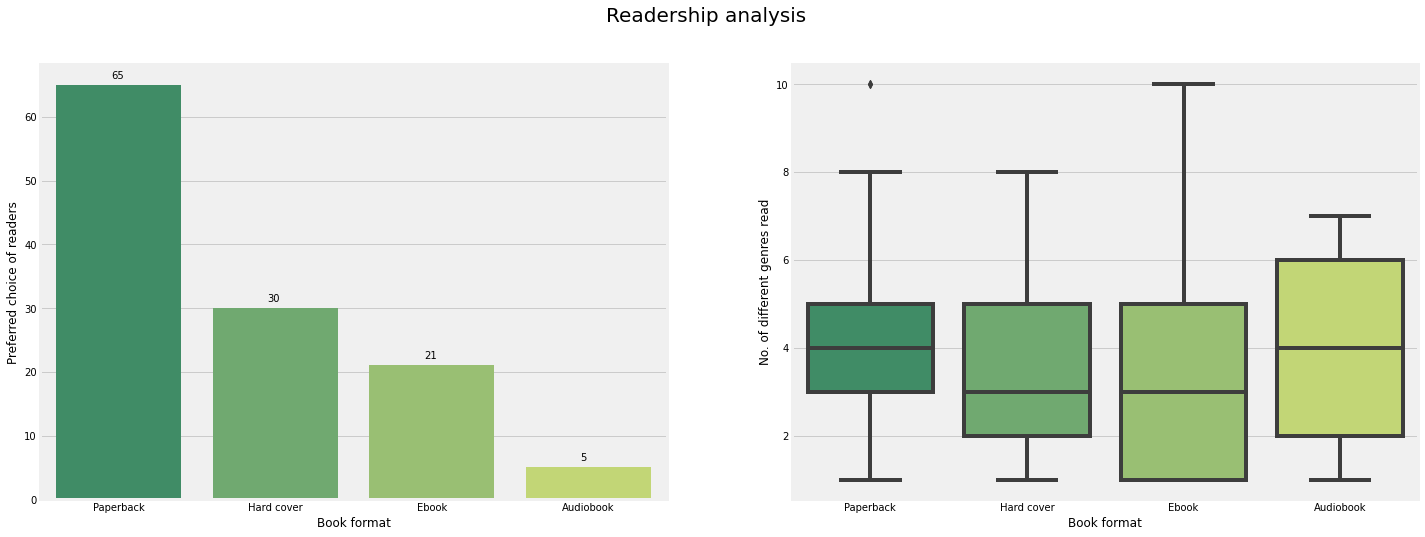

In [2]:
plot1(dataf, format_count)                  #Book format

## Inference:
    
1. Maximum readers read from paperbacks or hard cover books. This supports our idea that people would prefer reading from phyical books. 
       Hence people might come to our book cafe to read books.

2. Maximum no. of genres are read by ebook readers. However we do not plan on providing an ebook reading service to our customers.
    
3. The range of books read by paperback and hard cover book readers are same. We need to probe further to find out the total set of 
       different genres read by them.
    
4. People read more paperbacks than hard cover books, this is as expected.

## From here on all our analysis is on physical book readers


In [3]:
dataf, genres, pphc, d, bv = postprocess(dataf)        #Filters only physical book readers

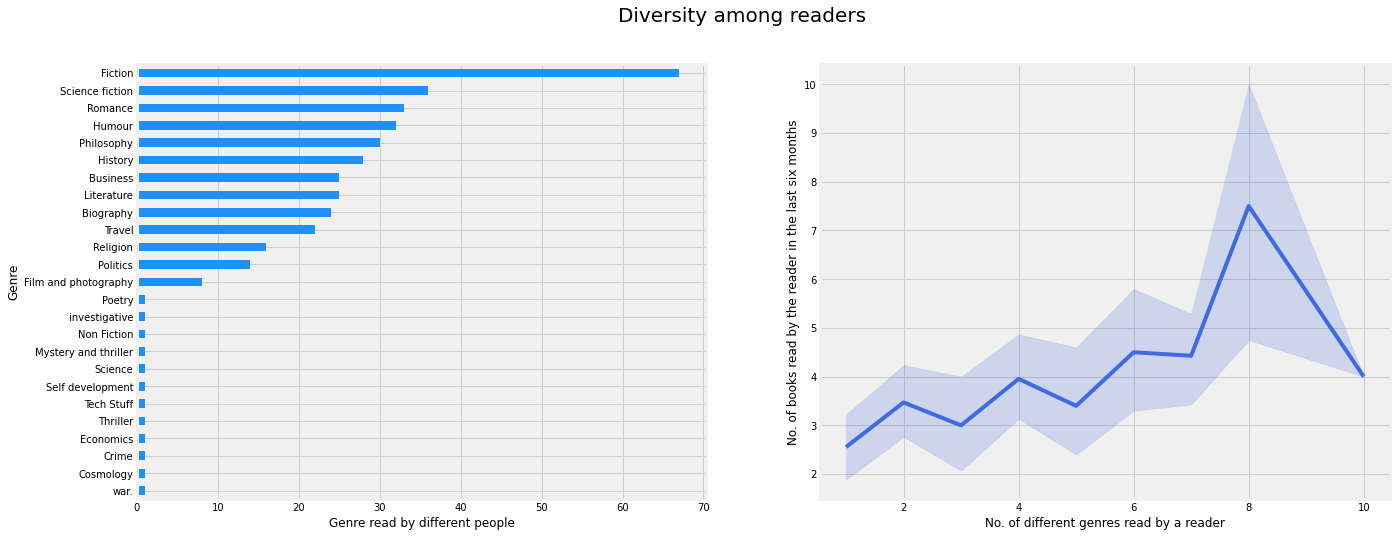

In [4]:
plot2(dataf, genres)                                   #Variety

##  Observations:

1. The no. of readers for fiction is almost double than any other category

2. There are 12 genres which are read by more than 10 people in our survey
    
3. People who read more, read more widely  

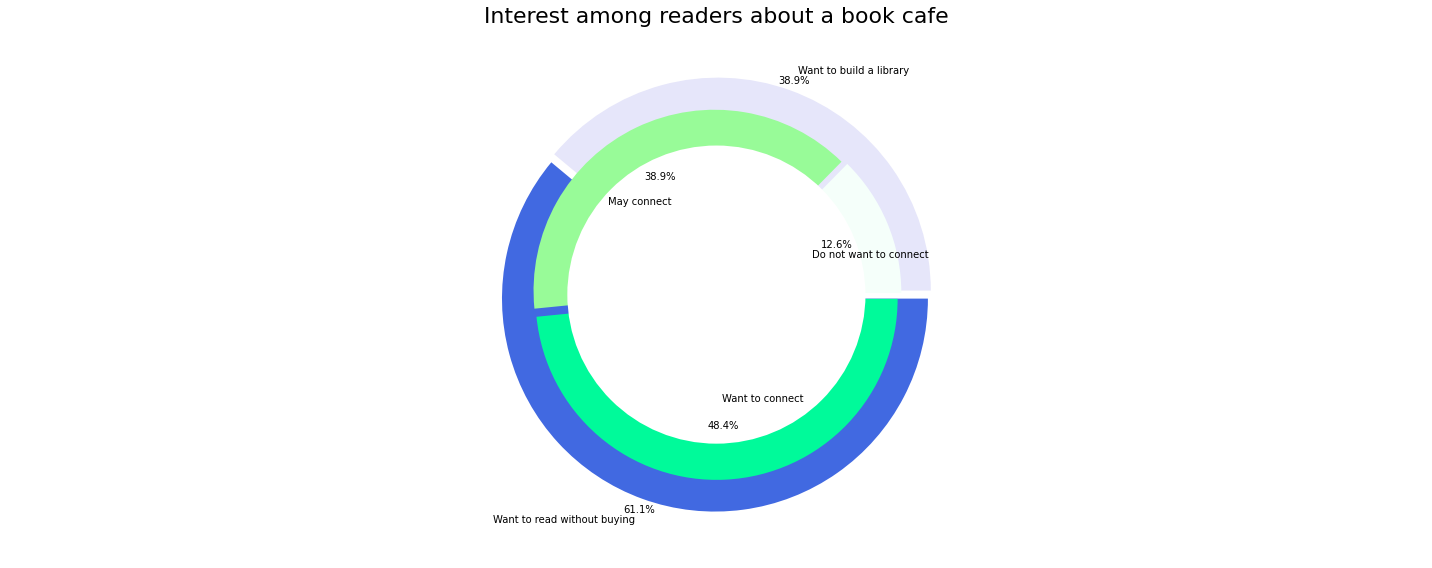

In [5]:
plot3(pphc, d)                                      #Socializing quotient

## Observations:

1. A high percentage(60%) of readers want to read books without buying them

2. Above 85% of readers are open to socialising with other book readers. 48% readers want to meet with fellow book readers

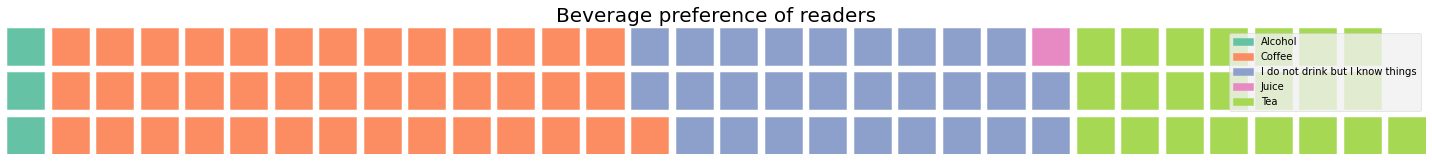

In [6]:
plot4(bv)                                                           #Beverage preferences

## Observations:

1. Maximum readers prefer coffee
    
2. Most other readers do not prefer any beverage or prefer tea

Hence providing a reading experience in a cafe is a good idea. 
    
We need to understand how many of people who do not drink coffee/tea, would want to meet fellow book readers

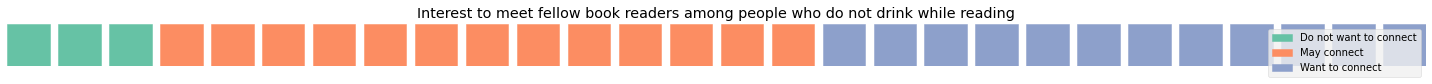

In [7]:
plot5(dataf)                                                        #Non drinkers

## Observations:

People who do not drink are interested to meet others. Hence, they would come to meet new and fellow book readers at the book cafe.

In [8]:
dmod.Beverage.replace({'I do not drink but I know things':'No drink required','None':'No drink required','No drink necessary':'No drink required','I drink but not with books':'No drink required','Depends upon mood and time of day':'No drink required','There is no connection between books and beverage':'No drink required'},inplace=True)
dmod.Connect.replace({'Yes! no. Well maybe....':'Maybe'},inplace=True)
dmod.Music.replace({'Yes, like my life':'Yes to music','Nope':'No to music'},inplace=True)

dk = dmod[["Beverage","Connect","Music"]].groupby(['Connect','Music','Beverage'])[["Beverage"]].count()
#dk.columns=["Count"]
dk.sort_values(["Connect","Music"], ascending=[False,True], inplace=True)
dk = pd.concat([dk.iloc[0:7,:],dk.iloc[13:20,:]])

## Observations:

1. Maximum people who drink coffee while reading want to connect with fellow book readers

2. Most of the people who want to connect drink cofee

3. Most people do not want to listen to music

# 6. Understanding feature importances

In [9]:
X,y = modeller(dmod)

In [11]:
lr=sm.Logit(y,X).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.516869
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  121
Model:                          Logit   Df Residuals:                      101
Method:                           MLE   Df Model:                           19
Date:                Wed, 07 Jul 2021   Pseudo R-squ.:                  0.1927
Time:                        16:41:49   Log-Likelihood:                -62.541
converged:                       True   LL-Null:                       -77.472
Covariance Type:            nonrobust   LLR p-value:                   0.05358
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Frequency                      -0.2521      0.107     -2.360      0.018      -0.461      -0.043
VarCount                        0.4924      0.325      1.515      0.130      -0.145       1.129
Genre_Fiction                  -0.6880      0.704     -0.977      0.328      -2.068       0.692
Genre_Science fiction          -0.0307      0.563     -0.055      0.957      -1.135       1.073
Genre_Humour                   -0.6757      0.665     -1.016      0.310      -1.979       0.628
Genre_Philosophy               -1.5258      0.631     -2.419      0.016      -2.762      -0.289
Genre_History                   0.2070      0.687      0.301      0.763      -1.139       1.553
Genre_Business                 -0.8173      0.641     -1.275      0.202      -2.073       0.439
Genre_Literature               -1.3227      0.731     -1.808      0.071      -2.756       0.111
Genre_Biography                -0.4638      0.664     -0.698      0.485      -1.766       0.839
Genre_Travel                   -0.3459      0.736     -0.470      0.638      -1.788       1.096
Genre_Religion                 -0.7277      0.744     -0.978      0.328      -2.186       0.731
Format__Ebook                   2.1807      0.972      2.244      0.025       0.276       4.086
Format__Hard cover              0.3277      0.789      0.416      0.678      -1.218       1.873
Format__Paperback               1.0001      0.762      1.313      0.189      -0.493       2.493
Beverage__No drink required     0.6633      0.547      1.212      0.225      -0.409       1.736
Beverage__Tea                  -0.1952      0.586     -0.333      0.739      -1.344       0.953
Music__Yes to music             1.2918      0.646      2.001      0.045       0.026       2.557
Connect_No                      1.6093      0.913      1.763      0.078      -0.180       3.398
Connect_Yes                     0.3903      0.512      0.762      0.446      -0.613       1.394
===============================================================================================
"""

## Observations:

Factors among people who would prefer to read books without buying them

    1. Frequency: Negative relation

    2. Whether the person reads philosophy: High negative relation

    3. Preferred format: ebook: Positive relation

    4. Prefer to listen to music: Positive relation

# 7. Hypothesis testing

$$ H_o = People\ wanting\ to\ read\ books\ without\ buying\ is\ not\ more\ than\ 80\%\  i.e.\ P_o<=80%$$
$$ H_a = People\ wanting\ to\ read\ books\ without\ buying\ is\ more\ than\ 80\%\  i.e.\ P_o>80%$$
$$ We\ will\ do\ a\ Z-test\ to\ determine\ this\ proportion.$$

$$ Z = \frac{\hat p - p_o}{\sqrt{\frac{p_o(1-p_o)}{n}}} $$

$$ \hat p=0.66 \\ p_o = 0.8 \\ n=120 $$


$$ Z = -3.83 \\ p=0  \\ \therefore we\ accept\ the\ null\ hypothesis$$

# 8. Conclusion

1. More than 60% people are interested in reading books without buying.

2. Above 85% of readers are open to socialising with other book readers.

3. Among expected customers most are expected to be coffee drinkers. 

# 9. Prospective future research
1. Most read titles in top ten genres - from Amazon
2. Among people who want to read without buying, why do some people do not want to come to the book cafe - survey required
3. Averarage reading duration, preferred reading hours and membership options - survey required
4. Prospective places for book cafes